In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Indoor

In [2]:
xls = pd.ExcelFile('data/Air Scan data(Indoor apartment study).xlsx')
df1 = pd.read_excel(xls, 'Shambhavi')
df2 = pd.read_excel(xls, "Milan's R")
df3 = pd.read_excel(xls, "Praveen's R")
df4 = pd.read_excel(xls, "Zaib's room")


In [3]:
#Sheet1
header_row = 1
df1.columns = df1.iloc[header_row]
df1.dropna()
df1=df1.iloc[2:]
df1.reset_index()
#sheet4
header_row = 0
df4.columns = df4.iloc[header_row]
df4.dropna()
df4=df4.iloc[1:]
df4.reset_index()

df2.dropna()
df3.dropna()
df1

1,Date,Time,PM2.5(ug/m3),PM10(ug/m3),co2(ppm ),hcho(ug/m3),tvoc(ug/m3),co(ppm ),no2(ppm ),o3(ppm ),t_ext,h_ext
2,2021.01.16,12:27:51,37,60,675,37,369,0.654,0.042,0.006,22.1,28.1
3,2021.01.16,12:27:52,37,60,675,37,369,0.654,0.042,0.006,22.1,28.1
4,2021.01.16,12:27:53,37,60,676,37,369,0.654,0.041,0.006,22.1,28.1
5,2021.01.16,12:27:54,37,60,676,37,369,0.654,0.041,0.006,22.1,28.1
6,2021.01.16,12:27:55,37,60,676,38,369,0.654,0.041,0.006,22.1,28.1
...,...,...,...,...,...,...,...,...,...,...,...,...
2505,2021.01.25,20:40:00,6,8,533,0,0,0,0.014,0,13.2,17.3
2506,2021.01.25,20:45:00,6,8,533,0,0,0,0.017,0,13.2,17.3
2507,2021.01.25,20:50:00,6,9,532,0,0,0,0.017,0,13.2,17.1
2508,2021.01.25,20:55:00,6,9,546,0,0,0,0.015,0,13.1,17.7


In [4]:
df2

,Date,Time,PM2.5(ug/m3),PM10(ug/m3),co2(ppm ),hcho(ug/m3),tvoc(ug/m3),co(ppm ),no2(ppm ),o3(ppm ),t_ext,h_ext
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022.01.15,20:50:00,18.0,26.0,2998.0,70.0,1336.0,1.565,0.026,0.001,20.8,47.9
2,2022.01.15,20:55:00,21.0,32.0,1228.0,15.0,1290.0,1.729,0.041,0.015,21.5,37.3
3,2022.01.15,21:00:00,21.0,33.0,1192.0,6.0,1142.0,1.835,0.037,0.022,22.1,37.2
4,2022.01.15,21:05:00,19.0,30.0,1240.0,6.0,1341.0,1.785,0.037,0.025,22.6,37.7
...,...,...,...,...,...,...,...,...,...,...,...,...
2022,2022.01.22,21:15:00,19.0,29.0,2269.0,0.0,3335.0,1.501,0.006,0.000,24.3,57.1
2023,2022.01.22,21:20:00,20.0,30.0,2273.0,0.0,3298.0,1.499,0.002,0.000,24.2,57.6
2024,2022.01.22,21:25:00,20.0,29.0,2261.0,0.0,3330.0,1.514,0.009,0.000,24.2,57.3
2025,2022.01.22,21:30:00,20.0,30.0,2241.0,0.0,3380.0,1.506,0.012,0.000,24.1,54.5


In [5]:
df3

,Date,Time,PM2.5(ug/m3),PM10(ug/m3),co2(ppm ),hcho(ug/m3),tvoc(ug/m3),co(ppm ),no2(ppm ),o3(ppm ),t_ext,h_ext
0,2022.01.15,20:25:00,15,23,2767,147,1349,1.198,0.015,0.027,20.5,51.9
1,2022.01.15,20:30:00,14,20,2874,152,1074,1.468,0.011,0.019,20.4,52.2
2,2022.01.15,20:35:00,13,19,3023,136,1009,1.732,0.006,0.014,20.4,52.6
3,2022.01.15,20:40:00,13,19,3183,107,940,2.011,0.001,0.011,20.5,52.8
4,2022.01.15,20:45:00,12,18,3306,64,930,2.212,0.000,0.006,20.6,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2025,2022.01.22,21:10:00,20,29,1892,22,98,1.084,0.020,0.029,20.1,59.2
2026,2022.01.22,21:15:00,36,55,1894,20,74,1.089,0.021,0.030,20.1,58.1
2027,2022.01.22,21:20:00,68,106,1918,36,89,1.092,0.016,0.027,20.1,58.4
2028,2022.01.22,21:25:00,69,107,1942,43,99,1.102,0.012,0.022,20.1,57.2


In [6]:
df4

,Date,Time,PM2.5(ug/m3),PM10(ug/m3),co2(ppm ),hcho(ug/m3),tvoc(ug/m3),co(ppm ),no2(ppm ),o3(ppm ),t_ext,h_ext
1,2022.01.08,15:40:00,26,47,1041,14,1675,35.109,0,0,20.5,54.8
2,2022.01.08,15:45:00,25,44,1110,14,1518,26.655,0,0.003,20.6,57.9
3,2022.01.08,15:50:00,24,42,1176,14,1446,18.322,0,0.002,20.4,59.6
4,2022.01.08,15:55:00,23,39,1234,14,1384,12.708,0,0.001,20.3,60.4
5,2022.01.08,16:00:00,22,40,1310,14,1304,9.181,0,0.001,20.2,60.7
...,...,...,...,...,...,...,...,...,...,...,...,...
2504,2022.01.17,08:15:00,7,10,2111,34,640,1.223,0.016,0.039,19.5,50.3
2505,2022.01.17,08:20:00,7,10,2128,27,566,1.608,0.019,0.04,19.4,50.7
2506,2022.01.17,08:25:00,7,10,2151,24,649,1.786,0.021,0.04,19.5,51.6
2507,2022.01.17,08:30:00,7,10,2152,26,654,1.781,0.02,0.038,19.5,51.1


In [7]:
df1['Date_Time']=df1['Date'].astype(str)+' '+df1['Time'].astype(str)
df1['Date_Time'] = pd.to_datetime(df1['Date_Time'])

df1 = df1.resample('60min', on='Date_Time').sum()


In [8]:
df1=df1.reset_index()
df1['Date_Time'] =df1['Date_Time'].values.astype(np.int64) // 10 ** 9
df1

1,Date_Time,Date,PM2.5(ug/m3),PM10(ug/m3),co2(ppm ),hcho(ug/m3),tvoc(ug/m3),co(ppm ),no2(ppm ),o3(ppm ),t_ext,h_ext
0,1610798400,2021.01.162021.01.162021.01.162021.01.162021.0...,7590,12261,144104,9746,94694,136.555,8.498,0.997,4592.4,5792.1
1,1610802000,0,0,0,0,0,0,0.000,0.000,0.000,0.0,0.0
2,1610805600,0,0,0,0,0,0,0.000,0.000,0.000,0.0,0.0
3,1610809200,0,0,0,0,0,0,0.000,0.000,0.000,0.0,0.0
4,1610812800,0,0,0,0,0,0,0.000,0.000,0.000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
223,1611601200,2021.01.252021.01.252021.01.252021.01.252021.0...,148,233,12668,0,0,0.000,0.282,0.000,316.2,411.6
224,1611604800,2021.01.252021.01.252021.01.252021.01.252021.0...,165,252,12718,0,0,0.002,0.305,0.000,313.6,415.2
225,1611608400,2021.01.252021.01.252021.01.252021.01.252021.0...,114,167,6985,0,0,0.016,0.117,0.000,165.5,228.7
226,1611612000,2021.01.252021.01.252021.01.252021.01.252021.0...,103,156,6381,0,0,0.008,0.106,0.000,151.3,207.6


In [9]:
df2['Date_Time']=df2['Date'].astype(str)+' '+df2['Time'].astype(str)
df2['Date_Time'] = pd.to_datetime(df1['Date_Time'])

df2 = df2.resample('60min', on='Date_Time').sum()
df2=df1.reset_index()
df2['Date_Time'] =df2['Date_Time'].values.astype(np.int64) // 10 ** 9
df2

1,index,Date_Time,Date,PM2.5(ug/m3),PM10(ug/m3),co2(ppm ),hcho(ug/m3),tvoc(ug/m3),co(ppm ),no2(ppm ),o3(ppm ),t_ext,h_ext
0,0,1,2021.01.162021.01.162021.01.162021.01.162021.0...,7590,12261,144104,9746,94694,136.555,8.498,0.997,4592.4,5792.1
1,1,1,0,0,0,0,0,0,0.000,0.000,0.000,0.0,0.0
2,2,1,0,0,0,0,0,0,0.000,0.000,0.000,0.0,0.0
3,3,1,0,0,0,0,0,0,0.000,0.000,0.000,0.0,0.0
4,4,1,0,0,0,0,0,0,0.000,0.000,0.000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,223,1,2021.01.252021.01.252021.01.252021.01.252021.0...,148,233,12668,0,0,0.000,0.282,0.000,316.2,411.6
224,224,1,2021.01.252021.01.252021.01.252021.01.252021.0...,165,252,12718,0,0,0.002,0.305,0.000,313.6,415.2
225,225,1,2021.01.252021.01.252021.01.252021.01.252021.0...,114,167,6985,0,0,0.016,0.117,0.000,165.5,228.7
226,226,1,2021.01.252021.01.252021.01.252021.01.252021.0...,103,156,6381,0,0,0.008,0.106,0.000,151.3,207.6


In [10]:
df3['Date_Time']=df3['Date'].astype(str)+' '+df3['Time'].astype(str)
df3['Date_Time'] = pd.to_datetime(df3['Date_Time'])

df3 = df3.resample('60min', on='Date_Time').sum()
df3=df3.reset_index()
df3['Date_Time'] =df3['Date_Time'].values.astype(np.int64) // 10 ** 9
df3

,Date_Time,PM2.5(ug/m3),PM10(ug/m3),co2(ppm ),hcho(ug/m3),tvoc(ug/m3),co(ppm ),no2(ppm ),o3(ppm ),t_ext,h_ext
0,1642276800,104,153,20118,676,6695,13.251,0.033,0.081,143.5,345.6
1,1642280400,199,297,23532,169,3452,19.778,0.034,0.130,246.5,534.6
2,1642284000,1296,2328,23769,794,1959,16.756,0.097,0.136,247.2,581.7
3,1642287600,1758,3135,21503,905,1543,15.103,0.185,0.192,247.4,600.5
4,1642291200,1120,1922,20408,736,398,12.780,0.228,0.258,242.3,592.0
...,...,...,...,...,...,...,...,...,...,...,...
165,1642870800,303,452,17812,319,255,11.841,0.400,0.469,234.5,729.6
166,1642874400,256,378,19612,262,57,11.537,0.317,0.410,236.5,746.9
167,1642878000,244,358,21029,236,149,11.949,0.298,0.391,237.6,742.6
168,1642881600,240,349,21972,224,493,12.509,0.304,0.402,239.8,731.8


In [11]:
df4['Date_Time']=df4['Date'].astype(str)+' '+df4['Time'].astype(str)
df4['Date_Time'] = pd.to_datetime(df4['Date_Time'])

df4 = df4.resample('60min', on='Date_Time').sum()
df4=df4.reset_index()
df4['Date_Time'] =df4['Date_Time'].values.astype(np.int64) // 10 ** 9
df4

,Date_Time,Date,PM2.5(ug/m3),PM10(ug/m3),co2(ppm ),hcho(ug/m3),tvoc(ug/m3),co(ppm ),no2(ppm ),o3(ppm ),t_ext,h_ext
0,1641654000,2022.01.082022.01.082022.01.082022.01.08,98,172,4561,56,6023,92.794,0.000,0.006,81.8,232.7
1,1641657600,2022.01.082022.01.082022.01.082022.01.082022.0...,219,365,19614,220,12807,44.154,0.000,0.067,242.4,724.2
2,1641661200,2022.01.082022.01.082022.01.082022.01.082022.0...,158,248,29978,220,10649,18.302,0.000,0.141,248.7,713.2
3,1641664800,2022.01.082022.01.082022.01.082022.01.082022.0...,127,195,39651,167,10520,18.275,0.006,0.185,245.2,743.6
4,1641668400,2022.01.082022.01.082022.01.082022.01.082022.0...,272,483,43046,307,9858,18.752,0.002,0.185,240.7,749.7
...,...,...,...,...,...,...,...,...,...,...,...,...
205,1642392000,2022.01.172022.01.172022.01.172022.01.172022.0...,62,89,27108,525,13217,12.868,0.000,0.219,251.9,599.5
206,1642395600,2022.01.172022.01.172022.01.172022.01.172022.0...,60,82,26103,529,12102,11.967,0.000,0.231,249.0,593.8
207,1642399200,2022.01.172022.01.172022.01.172022.01.172022.0...,60,82,25651,511,10605,12.614,0.000,0.293,244.4,591.9
208,1642402800,2022.01.172022.01.172022.01.172022.01.172022.0...,71,100,25389,458,8835,12.753,0.068,0.400,235.2,605.6


In [12]:
df1.columns

Index(['Date_Time', 'Date', 'PM2.5(ug/m3)', 'PM10(ug/m3)', 'co2(ppm  )',
       'hcho(ug/m3)', 'tvoc(ug/m3)', 'co(ppm  )', 'no2(ppm  )', 'o3(ppm  )',
       't_ext', 'h_ext'],
      dtype='object', name=1)

In [13]:
df1['no2(ppm  )']=df1['no2(ppm  )'].astype(float)*1000
df1['o3(ppm  )']=df1['o3(ppm  )'].astype(float)*1000
df1['co(ppm  )']=df1['co(ppm  )'].astype(float)*100

In [14]:
df2['no2(ppm  )']=df2['no2(ppm  )'].astype(float)*1000
df2['o3(ppm  )']=df2['o3(ppm  )'].astype(float)*1000
df2['co(ppm  )']=df2['co(ppm  )'].astype(float)*100

In [15]:
df3['no2(ppm  )']=df3['no2(ppm  )'].astype(float)*1000
df3['o3(ppm  )']=df3['o3(ppm  )'].astype(float)*1000
df3['co(ppm  )']=df3['co(ppm  )'].astype(float)*100

In [16]:
df4['no2(ppm  )']=df4['no2(ppm  )'].astype(float)*1000
df4['o3(ppm  )']=df4['o3(ppm  )'].astype(float)*1000
df4['co(ppm  )']=df4['co(ppm  )'].astype(float)*100

In [17]:
df1

1,Date_Time,Date,PM2.5(ug/m3),PM10(ug/m3),co2(ppm ),hcho(ug/m3),tvoc(ug/m3),co(ppm ),no2(ppm ),o3(ppm ),t_ext,h_ext
0,1610798400,2021.01.162021.01.162021.01.162021.01.162021.0...,7590,12261,144104,9746,94694,13655.5,8498.0,997.0,4592.4,5792.1
1,1610802000,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
2,1610805600,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
3,1610809200,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
4,1610812800,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
223,1611601200,2021.01.252021.01.252021.01.252021.01.252021.0...,148,233,12668,0,0,0.0,282.0,0.0,316.2,411.6
224,1611604800,2021.01.252021.01.252021.01.252021.01.252021.0...,165,252,12718,0,0,0.2,305.0,0.0,313.6,415.2
225,1611608400,2021.01.252021.01.252021.01.252021.01.252021.0...,114,167,6985,0,0,1.6,117.0,0.0,165.5,228.7
226,1611612000,2021.01.252021.01.252021.01.252021.01.252021.0...,103,156,6381,0,0,0.8,106.0,0.0,151.3,207.6


In [18]:
df2

1,index,Date_Time,Date,PM2.5(ug/m3),PM10(ug/m3),co2(ppm ),hcho(ug/m3),tvoc(ug/m3),co(ppm ),no2(ppm ),o3(ppm ),t_ext,h_ext
0,0,1,2021.01.162021.01.162021.01.162021.01.162021.0...,7590,12261,144104,9746,94694,13655.5,8498.0,997.0,4592.4,5792.1
1,1,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
2,2,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
3,3,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
4,4,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,223,1,2021.01.252021.01.252021.01.252021.01.252021.0...,148,233,12668,0,0,0.0,282.0,0.0,316.2,411.6
224,224,1,2021.01.252021.01.252021.01.252021.01.252021.0...,165,252,12718,0,0,0.2,305.0,0.0,313.6,415.2
225,225,1,2021.01.252021.01.252021.01.252021.01.252021.0...,114,167,6985,0,0,1.6,117.0,0.0,165.5,228.7
226,226,1,2021.01.252021.01.252021.01.252021.01.252021.0...,103,156,6381,0,0,0.8,106.0,0.0,151.3,207.6


In [19]:
df3

,Date_Time,PM2.5(ug/m3),PM10(ug/m3),co2(ppm ),hcho(ug/m3),tvoc(ug/m3),co(ppm ),no2(ppm ),o3(ppm ),t_ext,h_ext
0,1642276800,104,153,20118,676,6695,1325.1,33.0,81.0,143.5,345.6
1,1642280400,199,297,23532,169,3452,1977.8,34.0,130.0,246.5,534.6
2,1642284000,1296,2328,23769,794,1959,1675.6,97.0,136.0,247.2,581.7
3,1642287600,1758,3135,21503,905,1543,1510.3,185.0,192.0,247.4,600.5
4,1642291200,1120,1922,20408,736,398,1278.0,228.0,258.0,242.3,592.0
...,...,...,...,...,...,...,...,...,...,...,...
165,1642870800,303,452,17812,319,255,1184.1,400.0,469.0,234.5,729.6
166,1642874400,256,378,19612,262,57,1153.7,317.0,410.0,236.5,746.9
167,1642878000,244,358,21029,236,149,1194.9,298.0,391.0,237.6,742.6
168,1642881600,240,349,21972,224,493,1250.9,304.0,402.0,239.8,731.8


In [20]:
df4

,Date_Time,Date,PM2.5(ug/m3),PM10(ug/m3),co2(ppm ),hcho(ug/m3),tvoc(ug/m3),co(ppm ),no2(ppm ),o3(ppm ),t_ext,h_ext
0,1641654000,2022.01.082022.01.082022.01.082022.01.08,98,172,4561,56,6023,9279.4,0.0,6.0,81.8,232.7
1,1641657600,2022.01.082022.01.082022.01.082022.01.082022.0...,219,365,19614,220,12807,4415.4,0.0,67.0,242.4,724.2
2,1641661200,2022.01.082022.01.082022.01.082022.01.082022.0...,158,248,29978,220,10649,1830.2,0.0,141.0,248.7,713.2
3,1641664800,2022.01.082022.01.082022.01.082022.01.082022.0...,127,195,39651,167,10520,1827.5,6.0,185.0,245.2,743.6
4,1641668400,2022.01.082022.01.082022.01.082022.01.082022.0...,272,483,43046,307,9858,1875.2,2.0,185.0,240.7,749.7
...,...,...,...,...,...,...,...,...,...,...,...,...
205,1642392000,2022.01.172022.01.172022.01.172022.01.172022.0...,62,89,27108,525,13217,1286.8,0.0,219.0,251.9,599.5
206,1642395600,2022.01.172022.01.172022.01.172022.01.172022.0...,60,82,26103,529,12102,1196.7,0.0,231.0,249.0,593.8
207,1642399200,2022.01.172022.01.172022.01.172022.01.172022.0...,60,82,25651,511,10605,1261.4,0.0,293.0,244.4,591.9
208,1642402800,2022.01.172022.01.172022.01.172022.01.172022.0...,71,100,25389,458,8835,1275.3,68.0,400.0,235.2,605.6


In [21]:
# df1['Date_Time']=df1['Date'].astype(str)+' '+df1['Time'].astype(str)
# df1=df1.dropna()
# df1['Date_Time'] = pd.to_datetime(df1['Date_Time']).values.astype(np.int64) // 10 ** 9
# df2['Date_Time']=df2['Date'].astype(str)+' '+df2['Time'].astype(str)
# df2=df2.dropna()
# df2['Date_Time'] = pd.to_datetime(df2['Date_Time']).values.astype(np.int64) // 10 ** 9
# df3['Date_Time']=df3['Date'].astype(str)+' '+df3['Time'].astype(str)
# df3=df3.dropna()
# df3['Date_Time'] = pd.to_datetime(df3['Date_Time']).values.astype(np.int64) // 10 ** 9
# df4['Date_Time']=df4['Date'].astype(str)+' '+df4['Time'].astype(str)
# df4=df4.dropna()
# df4['Date_Time'] = pd.to_datetime(df4['Date_Time']).values.astype(np.int64) // 10 ** 9

## Outdoor

In [22]:
df = pd.read_excel("data/outdoor.xlsx")
df=df.iloc[2:]
df.reset_index()
new = df["날짜"].str.split(":", expand = True)

df["date"]= new[0]
df["time"]= new[1]
df['Date_Time']=df['date'].astype(str)
df['Date_Time'] = pd.to_datetime(df['Date_Time']).values.astype(np.int64) // 10 ** 9
df=df.fillna(0)
df

,날짜,PM10,PM2.5,ozone,이산화질소NO2,Unnamed: 5,일산화탄소(CO),아황산가스(SO2),Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,date,time,Date_Time
2,2022-01-30:24,18,7,0.033,좋음,0.013,0.3,좋음,0.003,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-01-30,24,1643500800
3,2022-01-30:23,18,7,0.027,좋음,0.020,0.3,좋음,0.002,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-01-30,23,1643500800
4,2022-01-30:22,20,7,0.030,좋음,0.019,0.3,좋음,0.002,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-01-30,22,1643500800
5,2022-01-30:21,26,8,0.012,보통,0.042,0.4,좋음,0.002,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-01-30,21,1643500800
6,2022-01-30:20,26,7,0.016,보통,0.033,0.4,좋음,0.002,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-01-30,20,1643500800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,2021-12-19:05,33,15,0.026,좋음,0.009,0.4,좋음,0.004,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-12-19,05,1639872000
1030,2021-12-19:04,34,14,0.028,좋음,0.009,0.4,좋음,0.003,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-12-19,04,1639872000
1031,2021-12-19:03,30,12,0.028,좋음,0.009,0.4,좋음,0.003,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-12-19,03,1639872000
1032,2021-12-19:02,21,11,0.024,좋음,0.015,0.4,좋음,0.002,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-12-19,02,1639872000


In [23]:
df.columns

Index(['날짜', 'PM10', 'PM2.5', 'ozone', '이산화질소NO2', 'Unnamed: 5', '일산화탄소(CO)',
       '아황산가스(SO2)', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'date', 'time', 'Date_Time'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 2 to 1033
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   날짜           1032 non-null   object 
 1   PM10         1032 non-null   object 
 2   PM2.5        1032 non-null   object 
 3   ozone        1032 non-null   object 
 4   이산화질소NO2     1032 non-null   object 
 5   Unnamed: 5   1032 non-null   object 
 6   일산화탄소(CO)    1032 non-null   object 
 7   아황산가스(SO2)   1032 non-null   object 
 8   Unnamed: 8   1032 non-null   object 
 9   Unnamed: 9   1032 non-null   float64
 10  Unnamed: 10  1032 non-null   float64
 11  Unnamed: 11  1032 non-null   float64
 12  Unnamed: 12  1032 non-null   float64
 13  Unnamed: 13  1032 non-null   float64
 14  Unnamed: 14  1032 non-null   float64
 15  Unnamed: 15  1032 non-null   float64
 16  Unnamed: 16  1032 non-null   float64
 17  Unnamed: 17  1032 non-null   float64
 18  Unnamed: 18  1032 non-null   float64
 19  Unname

In [25]:
df['ozone']=df['ozone'].astype(float)
df['ozone']=df['ozone']*1000

In [26]:
df['이산화질소NO2']=df['Unnamed: 5'].astype(float)
df['이산화질소NO2']=df['이산화질소NO2']*1000
df['일산화탄소(CO)']=df['일산화탄소(CO)'].astype(float)
df['일산화탄소(CO)']=df['일산화탄소(CO)']*100
df['아황산가스(SO2)']=df['Unnamed: 8'].astype(float)
df['아황산가스(SO2)']=df['아황산가스(SO2)']*1000
df

,날짜,PM10,PM2.5,ozone,이산화질소NO2,Unnamed: 5,일산화탄소(CO),아황산가스(SO2),Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,date,time,Date_Time
2,2022-01-30:24,18,7,33.0,13.0,0.013,30.0,3.0,0.003,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-01-30,24,1643500800
3,2022-01-30:23,18,7,27.0,20.0,0.020,30.0,2.0,0.002,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-01-30,23,1643500800
4,2022-01-30:22,20,7,30.0,19.0,0.019,30.0,2.0,0.002,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-01-30,22,1643500800
5,2022-01-30:21,26,8,12.0,42.0,0.042,40.0,2.0,0.002,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-01-30,21,1643500800
6,2022-01-30:20,26,7,16.0,33.0,0.033,40.0,2.0,0.002,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-01-30,20,1643500800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,2021-12-19:05,33,15,26.0,9.0,0.009,40.0,4.0,0.004,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-12-19,05,1639872000
1030,2021-12-19:04,34,14,28.0,9.0,0.009,40.0,3.0,0.003,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-12-19,04,1639872000
1031,2021-12-19:03,30,12,28.0,9.0,0.009,40.0,3.0,0.003,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-12-19,03,1639872000
1032,2021-12-19:02,21,11,24.0,15.0,0.015,40.0,2.0,0.002,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-12-19,02,1639872000


In [27]:
def getPredictionRF(df='',inp='',target='',testdf='',inpt='',tart=''):
    X = df[inp].values
    
    Y=df[target].values
    
    
#     X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.05)
    ## Train data Indoor
    X=X.reshape(-1,1)
    Y=Y.reshape(-1,1)
    ## Test data outdoor
    Xt=testdf[inpt].values
    Yt=testdf[tart].values
    
    
    regressor = RandomForestRegressor(n_estimators = 240)
    regressor.fit(X, Y)
    try:
        y_pred = regressor.predict(Xt.reshape(-1,1))
        RFR= pd.DataFrame({'measured indoor {}'.format(target):Yt.reshape(-1), 'Predicted indoor {}'.format(target):y_pred.reshape(-1)})
        RFR['measured indoor {}'.format(target)]=RFR['measured indoor {}'.format(target)].astype(int)
        RFR['Predicted indoor {}'.format(target)]=RFR['Predicted indoor {}'.format(target)].astype(int)

        print('Mean Absolute Error of {}:'.format(target), metrics.mean_absolute_error(Yt, y_pred))  
        print('Mean Squared Error of {}:'.format(target), metrics.mean_squared_error(Yt, y_pred))  
        print('Root Mean Squared Error of {}:'.format(target), np.sqrt(metrics.mean_squared_error(Yt, y_pred)))

        fig, ax = plt.subplots(figsize=(8, 6))
        sns.regplot(x='measured indoor {}'.format(target), y= 'Predicted indoor {}'.format(target) , data=RFR)
        plt.show()
    except:
        pass


def getPredictionLR(df='',inp='',target='',testdf='',inpt='',tart=''):
    X = df[inp].values
    
    Y=df[target].values
    
    ## Train data Indoor
    X=X.reshape(-1,1)
    Y=Y.reshape(-1,1)
    ## Test data outdoor
    Xt=testdf[inpt].values
    Yt=testdf[tart].values
    
#     X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.05)
#     X_train=X_train.reshape(-1,1)
#     y_train=y_train.reshape(-1,1)
    
    regressor = LinearRegression()
    regressor.fit(X,Y)
    try:
        y_pred = regressor.predict(Xt.reshape(-1,1))
        RFR= pd.DataFrame({'measured indoor {}'.format(target):Yt.reshape(-1), 'Predicted indoor {}'.format(target):y_pred.reshape(-1)})
        RFR['measured indoor {}'.format(target)]=RFR['measured indoor {}'.format(target)].astype(int)
        RFR['Predicted indoor {}'.format(target)]=RFR['Predicted indoor {}'.format(target)].astype(int)

        print('Mean Absolute Error of {}:'.format(target), metrics.mean_absolute_error(Yt, y_pred))  
        print('Mean Squared Error of {}:'.format(target), metrics.mean_squared_error(Yt, y_pred))  
        print('Root Mean Squared Error of {}:'.format(target), np.sqrt(metrics.mean_squared_error(Yt, y_pred)))

        fig, ax = plt.subplots(figsize=(8, 6))
        sns.regplot(x='measured indoor {}'.format(target), y= 'Predicted indoor {}'.format(target) , data=RFR)
        plt.show()  
    except:
        pass

    


## Random Forest

<ipython-input-27-212e44fa254a>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, Y)


Mean Absolute Error of PM10(ug/m3): 121.0883720930233
Mean Squared Error of PM10(ug/m3): 15151.30780361757
Root Mean Squared Error of PM10(ug/m3): 123.09064872530963


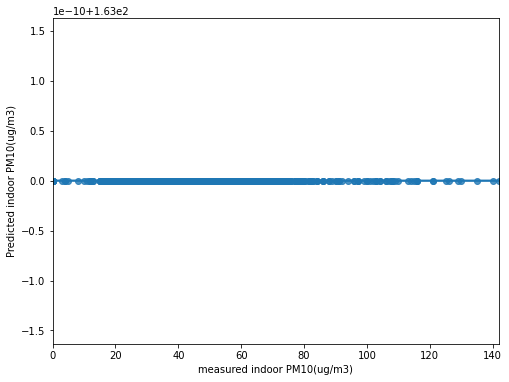

<ipython-input-27-212e44fa254a>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, Y)


Mean Absolute Error of PM2.5(ug/m3): 81.83546511627908
Mean Squared Error of PM2.5(ug/m3): 7010.718486757106
Root Mean Squared Error of PM2.5(ug/m3): 83.7300333617341


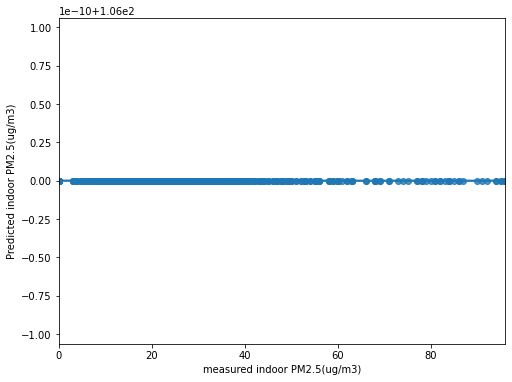

In [28]:
## Sheet Shambhavi

prdPm10=getPredictionRF(df=df1,inp='Date_Time',target='PM10(ug/m3)',testdf=df,inpt='Date_Time',tart='PM10')
prdPm25=getPredictionRF(df=df1,inp='Date_Time',target='PM2.5(ug/m3)',testdf=df,inpt='Date_Time',tart='PM2.5')
# prdco2=getPredictionRF(df=df1,inp='Date_Time',target='co2(ppm  )')
# prdtvoc=getPredictionRF(df=df1,inp='Date_Time',target='tvoc(ug/m3)',)
for va in[prdPm10,prdPm25]:
    if va is None:
        break
    print(va)

<ipython-input-27-212e44fa254a>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, Y)


Mean Absolute Error of PM10(ug/m3): 279.7192200462395
Mean Squared Error of PM10(ug/m3): 78731.75601075566
Root Mean Squared Error of PM10(ug/m3): 280.5917960503401


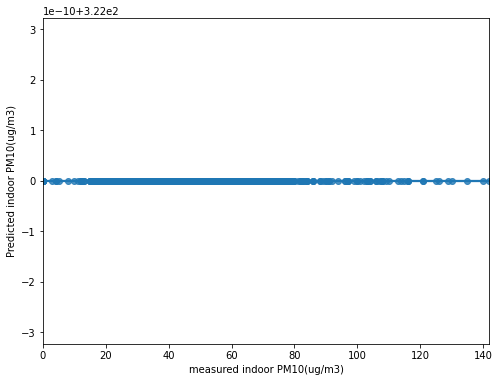

<ipython-input-27-212e44fa254a>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, Y)


Mean Absolute Error of PM2.5(ug/m3): 151.83323685910509
Mean Squared Error of PM2.5(ug/m3): 23542.245762592225
Root Mean Squared Error of PM2.5(ug/m3): 153.4348257814771


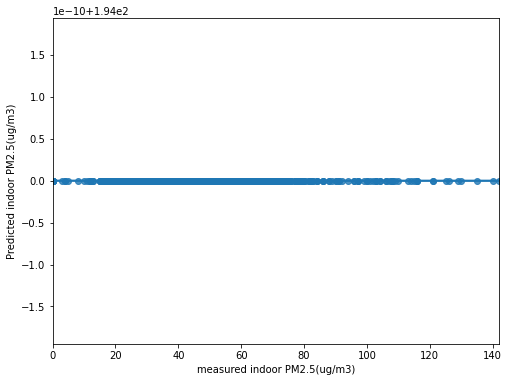

In [29]:
## Sheet Milan's R

prdPm10=getPredictionRF(df=df2,inp='Date_Time',target='PM10(ug/m3)',testdf=df,inpt='Date_Time',tart='PM10')
prdPm25=getPredictionRF(df=df2,inp='Date_Time',target='PM2.5(ug/m3)',testdf=df,inpt='Date_Time',tart='PM10')
# prdco2=getPredictionRF(df=df2,inp='Date_Time',target='co2(ppm  )')
# prdtvoc=getPredictionRF(df=df2,inp='Date_Time',target='tvoc(ug/m3)')
# prdnco=getPredictionRF(df=df1,inp='Date_Time',target='co(ppm  )')
for va in[prdPm10,prdPm25]:
    if va is None:
        break
    print(va)

<ipython-input-27-212e44fa254a>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, Y)


Mean Absolute Error of PM10(ug/m3): 457.69098837209293
Mean Squared Error of PM10(ug/m3): 300071.7793996286
Root Mean Squared Error of PM10(ug/m3): 547.7880789133957


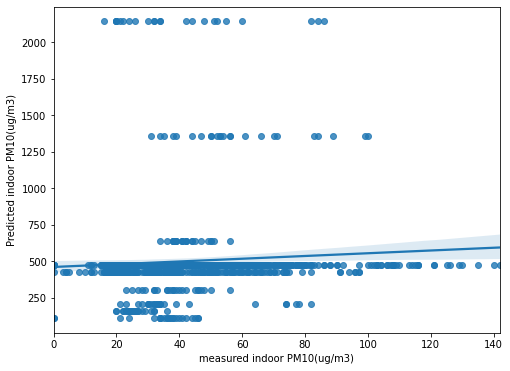

<ipython-input-27-212e44fa254a>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, Y)


Mean Absolute Error of PM2.5(ug/m3): 280.92374031007756
Mean Squared Error of PM2.5(ug/m3): 109221.11425670222
Root Mean Squared Error of PM2.5(ug/m3): 330.4861786167497


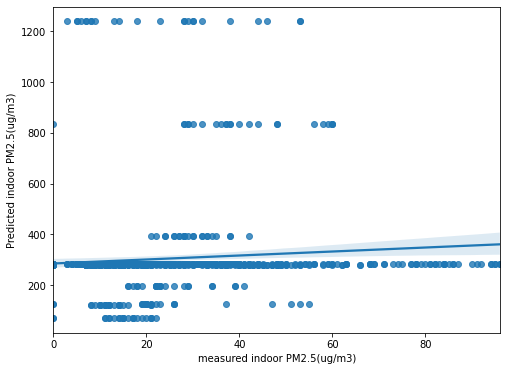

In [30]:
## Sheet Praveen's R

prdPm10=getPredictionRF(df=df3,inp='Date_Time',target='PM10(ug/m3)',testdf=df,inpt='Date_Time',tart='PM10')
prdPm25=getPredictionRF(df=df3,inp='Date_Time',target='PM2.5(ug/m3)',testdf=df,inpt='Date_Time',tart='PM2.5')
# prdco2=getPredictionRF(df=df3,inp='Date_Time',target='co2(ppm  )')
# prdtvoc=getPredictionRF(df=df3,inp='Date_Time',target='tvoc(ug/m3)')
# prdnco=getPredictionRF(df=df1,inp='Date_Time',target='co(ppm  )')
for va in[prdPm10,prdPm25]:
    if va is None:
        break
    print(va)

<ipython-input-27-212e44fa254a>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, Y)


Mean Absolute Error of PM10(ug/m3): 359.1685239018087
Mean Squared Error of PM10(ug/m3): 861857.9897472545
Root Mean Squared Error of PM10(ug/m3): 928.3630700040014


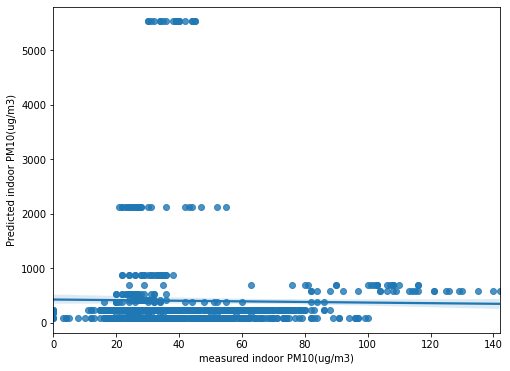

<ipython-input-27-212e44fa254a>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, Y)


Mean Absolute Error of PM2.5(ug/m3): 213.5487403100775
Mean Squared Error of PM2.5(ug/m3): 286055.4515390826
Root Mean Squared Error of PM2.5(ug/m3): 534.8415200216627


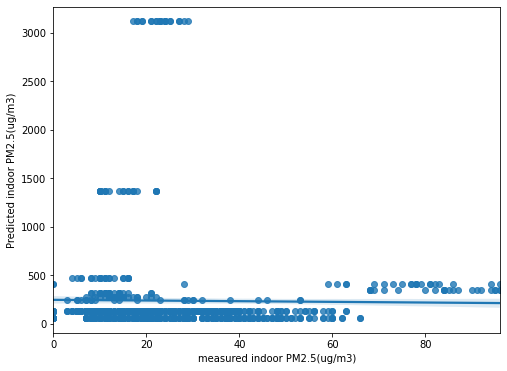

In [31]:
## Sheet Zaib's room

prdPm10=getPredictionRF(df=df4,inp='Date_Time',target='PM10(ug/m3)',testdf=df,inpt='Date_Time',tart='PM10')
prdPm25=getPredictionRF(df=df4,inp='Date_Time',target='PM2.5(ug/m3)',testdf=df,inpt='Date_Time',tart='PM2.5')
# prdco2=getPredictionRF(df=df4,inp='Date_Time',target='co2(ppm  )')
# prdtvoc=getPredictionRF(df=df4,inp='Date_Time',target='tvoc(ug/m3)')
# prdnco=getPredictionRF(df=df1,inp='Date_Time',target='co(ppm  )')
for va in[prdPm10,prdPm25]:
    if va is None:
        break
    print(va)

## Linear Regression

Mean Absolute Error of PM10(ug/m3): 3810.797220194839
Mean Squared Error of PM10(ug/m3): 14538036.17598236
Root Mean Squared Error of PM10(ug/m3): 3812.877676503976


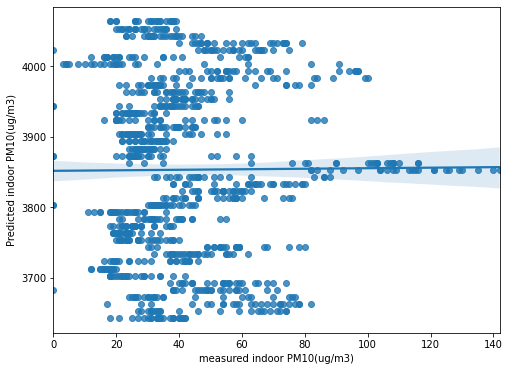

Mean Absolute Error of PM2.5(ug/m3): 2406.050502024428
Mean Squared Error of PM2.5(ug/m3): 5795415.924891886
Root Mean Squared Error of PM2.5(ug/m3): 2407.36701084232


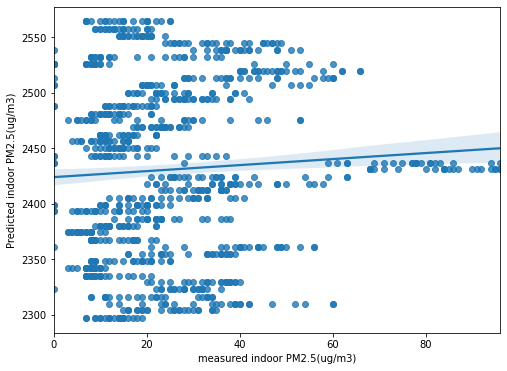

In [32]:
## Sheet Shambhavi

prdPm10=getPredictionLR(df=df1,inp='Date_Time',target='PM10(ug/m3)',testdf=df,inpt='Date_Time',tart='PM10')
prdPm25=getPredictionLR(df=df1,inp='Date_Time',target='PM2.5(ug/m3)',testdf=df,inpt='Date_Time',tart='PM2.5')
# prdco2=getPredictionLR(df=df1,inp='Date_Time',target='co2(ppm  )')
# prdtvoc=getPredictionLR(df=df1,inp='Date_Time',target='tvoc(ug/m3)')
for va in[prdPm10,prdPm25]:
    if va is None:
        break
    print(va)

Mean Absolute Error of PM10(ug/m3): 282.16381068951443
Mean Squared Error of PM10(ug/m3): 80105.33001030728
Root Mean Squared Error of PM10(ug/m3): 283.02885013776825


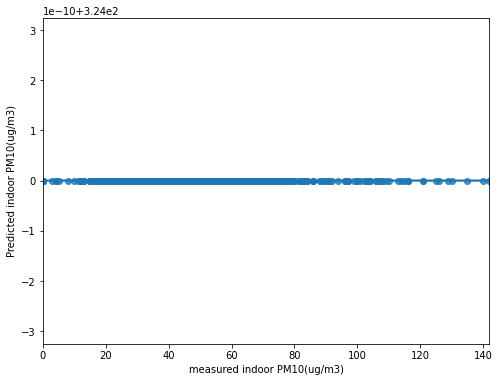

Mean Absolute Error of PM2.5(ug/m3): 169.05344757241946
Mean Squared Error of PM2.5(ug/m3): 28892.743272080137
Root Mean Squared Error of PM2.5(ug/m3): 169.97865534260512


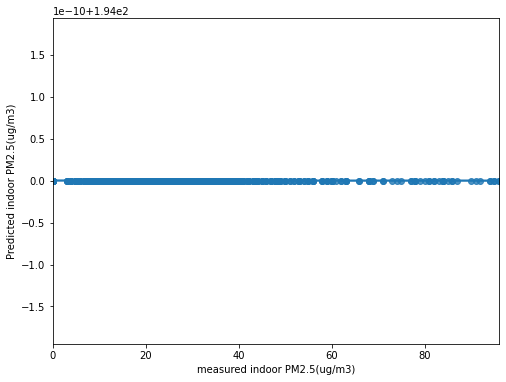

In [33]:
## Sheet Milan's R

prdPm10=getPredictionLR(df=df2,inp='Date_Time',target='PM10(ug/m3)',testdf=df,inpt='Date_Time',tart='PM10')
prdPm25=getPredictionLR(df=df2,inp='Date_Time',target='PM2.5(ug/m3)',testdf=df,inpt='Date_Time',tart='PM2.5')
# prdco2=getPredictionLR(df=df2,inp='Date_Time',target='co2(ppm  )',testdf=df,inpt='Date_Time',tart='PM10')
# prdtvoc=getPredictionLR(df=df2,inp='Date_Time',target='tvoc(ug/m3)')
# prdnco=getPredictionRF(df=df1,inp='Date_Time',target='co(ppm  )')
for va in[prdPm10,prdPm25]:
    if va is None:
        break
    print(va)

Mean Absolute Error of PM10(ug/m3): 563.3498598804033
Mean Squared Error of PM10(ug/m3): 431160.8093347087
Root Mean Squared Error of PM10(ug/m3): 656.6283647046545


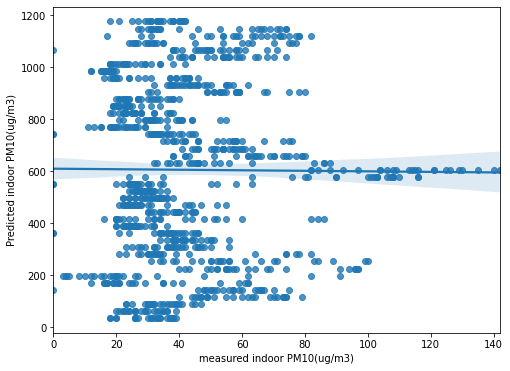

Mean Absolute Error of PM2.5(ug/m3): 296.22250217027454
Mean Squared Error of PM2.5(ug/m3): 109189.47935034035
Root Mean Squared Error of PM2.5(ug/m3): 330.4383139866507


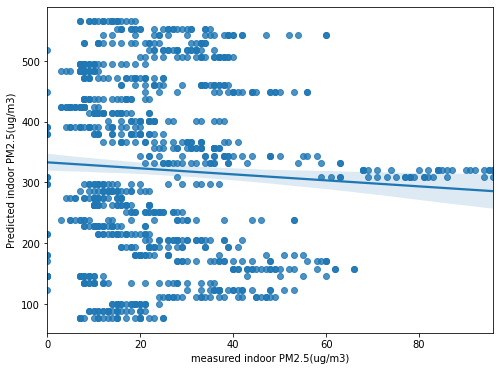

In [34]:
## Sheet Praveen's R

prdPm10=getPredictionLR(df=df3,inp='Date_Time',target='PM10(ug/m3)',testdf=df,inpt='Date_Time',tart='PM10')
prdPm25=getPredictionLR(df=df3,inp='Date_Time',target='PM2.5(ug/m3)',testdf=df,inpt='Date_Time',tart='PM2.5')
# prdco2=getPredictionLR(df=df3,inp='Date_Time',target='co2(ppm  )')
# prdtvoc=getPredictionLR(df=df3,inp='Date_Time',target='tvoc(ug/m3)')
# prdnco=getPredictionRF(df=df1,inp='Date_Time',target='co(ppm  )')
for va in[prdPm10,prdPm25]:
    if va is None:
        break
    print(va)

Mean Absolute Error of PM10(ug/m3): 643.3228357395441
Mean Squared Error of PM10(ug/m3): 602309.9128445057
Root Mean Squared Error of PM10(ug/m3): 776.0862792528327


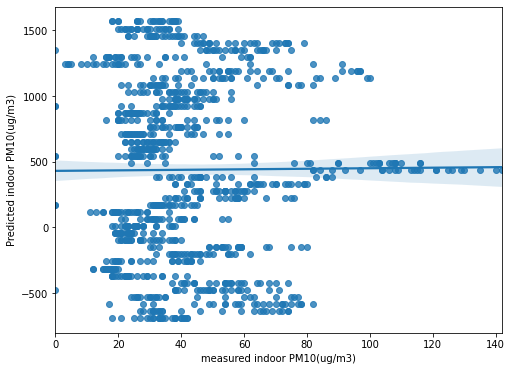

Mean Absolute Error of PM2.5(ug/m3): 442.8819388175309
Mean Squared Error of PM2.5(ug/m3): 279618.8795925651
Root Mean Squared Error of PM2.5(ug/m3): 528.7900146490714


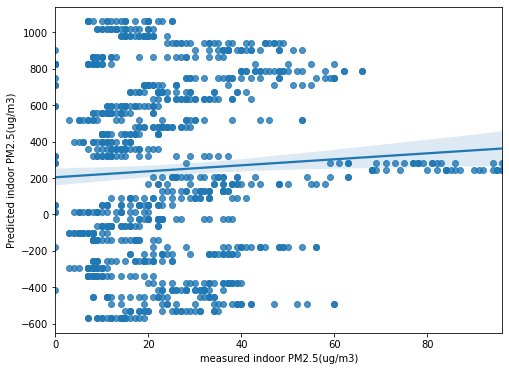

In [35]:
## Sheet Zaib's room

prdPm10=getPredictionLR(df=df4,inp='Date_Time',target='PM10(ug/m3)',testdf=df,inpt='Date_Time',tart='PM10')
prdPm25=getPredictionLR(df=df4,inp='Date_Time',target='PM2.5(ug/m3)',testdf=df,inpt='Date_Time',tart='PM2.5')
# prdco2=getPredictionLR(df=df4,inp='Date_Time',target='co2(ppm  )')
# prdtvoc=getPredictionLR(df=df4,inp='Date_Time',target='tvoc(ug/m3)')
# prdnco=getPredictionRF(df=df1,inp='Date_Time',target='co(ppm  )')
for va in[prdPm10,prdPm25]:
    if va is None:
        break
    print(va)

## ANN

In [36]:
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
import pickle as pk
import shutil,os
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [37]:


def trainANN(df='',inpt='',target='',k=5,n_epochs = 500,testdf=df,inptt='Date_Time',tart='PM10'):
    print('Geting Results for ',target)
    et=None
    x = df[inpt].values.astype(np.float32)
    y=df[target].values.astype(np.float32)
    if target=='PM10(ug/m3)':
        et=1
    elif target=='PM2.5(ug/m3)':
        et=2
    elif target=='co2(ppm  )':
        et=3
    elif target=='tvoc(ug/m3)':
        et=4
    ## Test data
    xt = testdf[inptt].values.astype(np.float32)
    yt=testdf[tart].values.astype(np.float32)
        
    
    checkpoint_no = 'ckpt_{}'.format(et)
    model_name = 'milan_ANN_2FC_F64_64_epoch_{}'.format(target)
#     train_ratio = 0.70
#     validation_ratio = 0.15
#     test_ratio = 0.15
#     trainX, testX, trainY, testY = train_test_split(x, y, test_size= 1 - train_ratio)
       
#     valX, testX, valY, testY = train_test_split(testX, testY, test_size=test_ratio/(test_ratio + validation_ratio))
    
    trainX=x.reshape(-1,1)
    testX=xt.reshape(-1,1)
    
    input_shape = trainX.shape[1]

    sc=StandardScaler()

    scaler = sc.fit(trainX)

    trainX_scaled = scaler.transform(trainX)
#     valX_scaled = scaler.transform(valX)
    testX_scaled = scaler.transform(testX)
    

    n_batch_size = 128

    n_steps_per_epoch = int(trainX.shape[0] / n_batch_size)
#     n_validation_steps = int(valX.shape[0] / n_batch_size)
    n_test_steps = int(testX.shape[0] / n_batch_size)

    
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(input_shape,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.summary()
    model.compile(loss='mse',optimizer='rmsprop',metrics=['mae'])
    checkpoint_dir = './'+ checkpoint_no
    if not os.path.exists(checkpoint_dir):
        os.makedirs(checkpoint_dir)

    keras_callbacks = [ModelCheckpoint(filepath = checkpoint_dir + '/' + model_name, 
                                       monitor='val_loss', save_best_only=True, mode='auto')]
    history = model.fit(trainX_scaled,
                    y,
                    steps_per_epoch=n_steps_per_epoch,
                    epochs=n_epochs,
                    batch_size=n_batch_size,
                    callbacks=[keras_callbacks])
    hist_df = pd.DataFrame(history.history)
    hist_df['epoch'] = hist_df.index + 1
    cols = list(hist_df.columns)
    cols = [cols[-1]] + cols[:-1]
    hist_df = hist_df[cols]
    
    
    
    values_of_best_model = hist_df[hist_df.val_loss == hist_df.val_loss.min()]
    try:
        os.mkdir(checkpoint_no)
    except OSError:
        pass
   
    
    mae = history.history['mae']
    val_mae = history.history['val_mae']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(mae) + 1)

    plt.plot(epochs, mae, 'bo', label='Training MAE {}'.format(target))
    plt.plot(epochs, val_mae, 'b', label='Validation MAE {}'.format(target))
    plt.title('Training and validation MAE {}'.format(target))
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss {}'.format(target))
    plt.plot(epochs, val_loss, 'b', label='Validation loss {}'.format(target))
    plt.title('Training and validation loss {}'.format(target))
    plt.legend()

    plt.show()
    
    
    num_val_samples = len(trainX) // k
    def build_model():
        model = models.Sequential()
        model.add(layers.Dense(64, activation='relu',
                               input_shape=(input_shape,)))
        model.add(layers.Dense(64, activation='relu'))
        model.add(layers.Dense(1))
        model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
        return model
    all_scores = []
    for i in range(k):
        print('Processing Fold {}'.format(target), i)
        val_data = trainX_scaled[i * num_val_samples: (i + 1) * num_val_samples]
        val_targets = trainY[i * num_val_samples: (i + 1) * num_val_samples]

        partial_train_data = np.concatenate(
            [trainX_scaled[:i * num_val_samples],
             trainX_scaled[(i + 1) * num_val_samples:]],
            axis=0)
        partial_train_targets = np.concatenate(
            [trainY[:i * num_val_samples],
             trainY[(i + 1) * num_val_samples:]],
            axis=0)

        model = build_model()
        model.fit(partial_train_data, partial_train_targets,
                  epochs=n_epochs, batch_size=n_batch_size, verbose=0)
        val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
        all_scores.append(val_mae)
        print('MAE {}: '.format(target) + str(val_mae))
        print('----------------------')
    for i, val in enumerate(all_scores):
        print('Fold {} '.format(target) + str(i) +': ' + 'MAE of', val)
    print('Mean MAE {} of all folds: '.format(target) + str(np.mean(all_scores)))
    all_mae_histories = []
    for i in range(k):
        print('Processing Fold {}'.format(target), i)
        val_data = trainX_scaled[i * num_val_samples: (i + 1) * num_val_samples]
        val_targets = trainY[i * num_val_samples: (i + 1) * num_val_samples]
        partial_train_data = np.concatenate(
            [trainX_scaled[:i * num_val_samples],
             trainX_scaled[(i + 1) * num_val_samples:]],
            axis=0)
        partial_train_targets = np.concatenate(
            [trainY[:i * num_val_samples],
             trainY[(i + 1) * num_val_samples:]],
            axis=0)

        model = build_model()
        history = model.fit(partial_train_data, partial_train_targets,
                            epochs=n_epochs, batch_size=n_batch_size, verbose=0)
        mae_history = history.history['val_mae']
        all_mae_histories.append(mae_history)
    average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(n_epochs)]
    plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
    plt.title('Validation MAE per Epoch {}'.format(target))
    plt.xlabel('Epochs {}'.format(target))
    plt.ylabel('Validation MAE {}'.format(target))
    plt.show()
    
    
    
    model_reloaded = load_model(checkpoint_no + '/' + model_name)
    root_directory = os.getcwd()
    checkpoint_dir = os.path.join(root_directory, checkpoint_no)
    model_name_temp = os.path.join(checkpoint_dir, model_name + '.h5')
    model_reloaded.save(model_name_temp)
    
    folder_name_temp = os.path.join(checkpoint_dir, model_name)
    shutil.rmtree(folder_name_temp, ignore_errors=True)
    best_model = load_model(model_name_temp)
    test_loss, test_mae = best_model.evaluate(testX_scaled,
                                          testY,
                                          steps=n_test_steps)
    
    test_loss, test_mae = best_model.evaluate(testX_scaled,
                                          testY,
                                          steps=n_test_steps)
    print('Test {} MAE:'.format(target), test_mae)
    
    y_pred = model.predict(testX_scaled)
    
    df_testY = pd.DataFrame(testY)
    df_y_pred = pd.DataFrame(y_pred)

    df_testY.reset_index(drop=True, inplace=True)
    df_y_pred.reset_index(drop=True, inplace=True)

    df_results = pd.concat([df_testY, df_y_pred], axis=1)
    df_results.columns = ['measured indoor {}'.format(target), 'Predicted indoor {}'.format(target)]
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.regplot(x="measured indoor {}".format(target), y= "Predicted indoor {}".format(target) , data=df_results, ax=ax)
    ax.set_xlim(0,80)
    plt.show()

    

    
    
 


In [38]:
## Sheet Shambhavi

prdPm10=trainANN(df=df1,inpt='Date_Time',target='PM10(ug/m3)',testdf=df,inptt='Date_Time',tart='PM10')
prdPm25=trainANN(df=df1,inpt='Date_Time',target='PM2.5(ug/m3)',testdf=df,inptt='Date_Time',tart='PM2.5')
# prdco2=trainANN(df=df1,inpt='Date_Time',target='co2(ppm  )')
# prdtvoc=trainANN(df=df1,inpt='Date_Time',target='tvoc(ug/m3)')
for va in[prdPm10,prdPm25]:
    if va is None:
        break
    print(va)

Geting Results for  PM10(ug/m3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                128       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
1/1 [==============================] - 1s 740ms/step - loss: 1349845.7500 - mae: 347.2271
Epoch 2/500
1/1 [==============================] - 0s 10ms/step - loss: 299171.1250 - mae: 295.4014
Epoch 3/500
1/1 [==============================] - 0s 20ms/step - loss: 1484958.5000

1/1 [==============================] - 0s 12ms/step - loss: 1370914.3750 - mae: 366.8431
Epoch 30/500
1/1 [==============================] - 0s 24ms/step - loss: 269637.0000 - mae: 269.7047
Epoch 31/500
1/1 [==============================] - 0s 11ms/step - loss: 1475937.0000 - mae: 382.0507
Epoch 32/500
1/1 [==============================] - 0s 39ms/step - loss: 134997.0000 - mae: 250.1723
Epoch 33/500
1/1 [==============================] - 0s 11ms/step - loss: 1487752.5000 - mae: 381.8918
Epoch 34/500
1/1 [==============================] - 0s 9ms/step - loss: 119650.7422 - mae: 250.3081
Epoch 35/500
1/1 [==============================] - 0s 8ms/step - loss: 136424.1406 - mae: 254.0105
Epoch 36/500
1/1 [==============================] - 0s 21ms/step - loss: 1849118.3750 - mae: 413.8978
Epoch 37/500
1/1 [==============================] - 0s 9ms/step - loss: 280873.4062 - mae: 290.5096
Epoch 38/500
1/1 [==============================] - 0s 12ms/step - loss: 1663960.1250 - mae: 367.1122
E

1/1 [==============================] - 0s 6ms/step - loss: 321206.0000 - mae: 288.1306
Epoch 92/500
1/1 [==============================] - 0s 6ms/step - loss: 1601434.3750 - mae: 366.1691
Epoch 93/500
1/1 [==============================] - 0s 9ms/step - loss: 1330516.5000 - mae: 351.0985
Epoch 94/500
1/1 [==============================] - 0s 10ms/step - loss: 308938.5000 - mae: 285.3995
Epoch 95/500
1/1 [==============================] - 0s 10ms/step - loss: 1481637.0000 - mae: 376.9329
Epoch 96/500
1/1 [==============================] - 0s 11ms/step - loss: 114942.6406 - mae: 252.0916
Epoch 97/500
1/1 [==============================] - 0s 10ms/step - loss: 116222.0391 - mae: 250.0610
Epoch 98/500
1/1 [==============================] - 0s 9ms/step - loss: 1862083.6250 - mae: 414.2333
Epoch 99/500
1/1 [==============================] - 0s 8ms/step - loss: 1477396.8750 - mae: 381.8583
Epoch 100/500
1/1 [==============================] - 0s 8ms/step - loss: 119155.8281 - mae: 245.3452
Epo

1/1 [==============================] - 0s 9ms/step - loss: 1288174.7500 - mae: 339.7425
Epoch 154/500
1/1 [==============================] - 0s 9ms/step - loss: 339708.0312 - mae: 290.4139
Epoch 155/500
1/1 [==============================] - 0s 13ms/step - loss: 239918.0156 - mae: 269.4737
Epoch 156/500
1/1 [==============================] - 0s 12ms/step - loss: 1680499.6250 - mae: 379.7862
Epoch 157/500
1/1 [==============================] - 0s 13ms/step - loss: 310914.6562 - mae: 300.5669
Epoch 158/500
1/1 [==============================] - 0s 13ms/step - loss: 1588586.1250 - mae: 339.5719
Epoch 159/500
1/1 [==============================] - 0s 12ms/step - loss: 330286.2500 - mae: 311.3236
Epoch 160/500
1/1 [==============================] - 0s 15ms/step - loss: 1562747.8750 - mae: 325.3566
Epoch 161/500
1/1 [==============================] - 0s 9ms/step - loss: 1288530.1250 - mae: 348.5950
Epoch 162/500
1/1 [==============================] - 0s 12ms/step - loss: 335160.7500 - mae: 2

1/1 [==============================] - 0s 9ms/step - loss: 208430.3438 - mae: 245.6733
Epoch 216/500
1/1 [==============================] - 0s 8ms/step - loss: 1684784.0000 - mae: 392.1728
Epoch 217/500
1/1 [==============================] - 0s 9ms/step - loss: 1426673.2500 - mae: 373.5038
Epoch 218/500
1/1 [==============================] - 0s 8ms/step - loss: 124071.9375 - mae: 228.0083
Epoch 219/500
1/1 [==============================] - 0s 9ms/step - loss: 132710.8594 - mae: 238.6568
Epoch 220/500
1/1 [==============================] - 0s 8ms/step - loss: 1779028.5000 - mae: 399.6342
Epoch 221/500
1/1 [==============================] - 0s 11ms/step - loss: 107979.5312 - mae: 233.7359
Epoch 222/500
1/1 [==============================] - 0s 13ms/step - loss: 1809251.8750 - mae: 405.1809
Epoch 223/500
1/1 [==============================] - 0s 11ms/step - loss: 1403011.0000 - mae: 362.9987
Epoch 224/500
1/1 [==============================] - 0s 9ms/step - loss: 150199.0938 - mae: 239.0

1/1 [==============================] - 0s 7ms/step - loss: 1447327.3750 - mae: 384.6723
Epoch 278/500
1/1 [==============================] - 0s 12ms/step - loss: 52184.3242 - mae: 184.9487
Epoch 279/500
1/1 [==============================] - 0s 10ms/step - loss: 146595.0312 - mae: 230.7474
Epoch 280/500
1/1 [==============================] - 0s 10ms/step - loss: 1715464.6250 - mae: 380.5352
Epoch 281/500
1/1 [==============================] - 0s 10ms/step - loss: 292290.3750 - mae: 283.1359
Epoch 282/500
1/1 [==============================] - 0s 7ms/step - loss: 1527192.3750 - mae: 312.2916
Epoch 283/500
1/1 [==============================] - 0s 12ms/step - loss: 1262217.1250 - mae: 314.3468
Epoch 284/500
1/1 [==============================] - 0s 8ms/step - loss: 283994.5312 - mae: 271.4212
Epoch 285/500
1/1 [==============================] - 0s 9ms/step - loss: 1250947.5000 - mae: 317.1137
Epoch 286/500
1/1 [==============================] - 0s 8ms/step - loss: 296782.8750 - mae: 266.

1/1 [==============================] - 0s 10ms/step - loss: 214800.6250 - mae: 238.5562
Epoch 340/500
1/1 [==============================] - 0s 9ms/step - loss: 1577418.7500 - mae: 330.3459
Epoch 341/500
1/1 [==============================] - 0s 17ms/step - loss: 1326442.3750 - mae: 318.5582
Epoch 342/500
1/1 [==============================] - 0s 13ms/step - loss: 152821.0938 - mae: 226.6480
Epoch 343/500
1/1 [==============================] - 0s 10ms/step - loss: 1271002.2500 - mae: 317.6779
Epoch 344/500
1/1 [==============================] - 0s 18ms/step - loss: 222203.6250 - mae: 226.1959
Epoch 345/500
1/1 [==============================] - 0s 10ms/step - loss: 1327782.2500 - mae: 319.2817
Epoch 346/500
1/1 [==============================] - 0s 7ms/step - loss: 147960.2031 - mae: 222.5198
Epoch 347/500
1/1 [==============================] - 0s 10ms/step - loss: 110825.4062 - mae: 207.2521
Epoch 348/500
1/1 [==============================] - 0s 6ms/step - loss: 1704091.8750 - mae: 3

1/1 [==============================] - 0s 10ms/step - loss: 1219569.6250 - mae: 283.7600
Epoch 402/500
1/1 [==============================] - 0s 10ms/step - loss: 246278.2188 - mae: 235.5901
Epoch 403/500
1/1 [==============================] - 0s 9ms/step - loss: 1218019.6250 - mae: 285.1170
Epoch 404/500
1/1 [==============================] - 0s 10ms/step - loss: 247098.3750 - mae: 233.1826
Epoch 405/500
1/1 [==============================] - 0s 6ms/step - loss: 1194251.6250 - mae: 274.4680
Epoch 406/500
1/1 [==============================] - 0s 10ms/step - loss: 276389.1875 - mae: 246.2328
Epoch 407/500
1/1 [==============================] - 0s 7ms/step - loss: 241002.4062 - mae: 233.8048
Epoch 408/500
1/1 [==============================] - 0s 6ms/step - loss: 1495418.5000 - mae: 297.4491
Epoch 409/500
1/1 [==============================] - 0s 12ms/step - loss: 1373044.7500 - mae: 326.3572
Epoch 410/500
1/1 [==============================] - 0s 8ms/step - loss: 45408.3867 - mae: 179.

1/1 [==============================] - 0s 24ms/step - loss: 110498.0156 - mae: 201.1823
Epoch 464/500
1/1 [==============================] - 0s 22ms/step - loss: 1641011.8750 - mae: 341.6596
Epoch 465/500
1/1 [==============================] - 0s 22ms/step - loss: 216052.2812 - mae: 226.8150
Epoch 466/500
1/1 [==============================] - 0s 22ms/step - loss: 1505223.2500 - mae: 309.7848
Epoch 467/500
1/1 [==============================] - 0s 12ms/step - loss: 1333514.5000 - mae: 322.5707
Epoch 468/500
1/1 [==============================] - 0s 23ms/step - loss: 74612.9766 - mae: 188.7177
Epoch 469/500
1/1 [==============================] - 0s 30ms/step - loss: 182004.8750 - mae: 208.2561
Epoch 470/500
1/1 [==============================] - 0s 18ms/step - loss: 1548282.2500 - mae: 334.5675
Epoch 471/500
1/1 [==============================] - 0s 16ms/step - loss: 188423.8750 - mae: 216.8940
Epoch 472/500
1/1 [==============================] - 0s 18ms/step - loss: 1539626.5000 - mae:

AttributeError: 'DataFrame' object has no attribute 'val_loss'

In [ ]:
## Sheet Milan's R

prdPm10=trainANN(df=df2,inpt='Date_Time',target='PM10(ug/m3)')
prdPm25=trainANN(df=df2,inpt='Date_Time',target='PM2.5(ug/m3)')
prdco2=trainANN(df=df2,inpt='Date_Time',target='co2(ppm  )')
prdtvoc=trainANN(df=df2,inpt='Date_Time',target='tvoc(ug/m3)')
# prdnco=getPredictionRF(df=df1,inp='Date_Time',target='co(ppm  )')
for va in[prdPm10,prdPm25,prdco2,prdtvoc]:
    if va is None:
        break
    print(va)

In [ ]:
## Sheet Praveen's R

prdPm10=trainANN(df=df3,inpt='Date_Time',target='PM10(ug/m3)')
prdPm25=trainANN(df=df3,inpt='Date_Time',target='PM2.5(ug/m3)')
prdco2=trainANN(df=df3,inpt='Date_Time',target='co2(ppm  )')
prdtvoc=trainANN(df=df3,inpt='Date_Time',target='tvoc(ug/m3)')
# prdnco=getPredictionRF(df=df1,inp='Date_Time',target='co(ppm  )')
for va in[prdPm10,prdPm25,prdco2,prdtvoc]:
    if va is None:
        break
    print(va)

In [ ]:
## Sheet Zaib's room

prdPm10=trainANN(df=df4,inpt='Date_Time',target='PM10(ug/m3)')
prdPm25=trainANN(df=df4,inpt='Date_Time',target='PM2.5(ug/m3)')
prdco2=trainANN(df=df4,inpt='Date_Time',target='co2(ppm  )')
prdtvoc=trainANN(df=df4,inpt='Date_Time',target='tvoc(ug/m3)')
# prdnco=getPredictionRF(df=df1,inp='Date_Time',target='co(ppm  )')
for va in[prdPm10,prdPm25,prdco2,prdtvoc]:
    if va is None:
        break
    print(va)

## Outdoor

In [ ]:
# # header_row = 1
# # df.columns = df.iloc[header_row]
# df=df.dropna()
# df
df=df.iloc[2:]
df.reset_index()

In [ ]:
new = df["날짜"].str.split(":", expand = True)

df["date"]= new[0]
df["time"]= new[1]
df['Date_Time']=df['date'].astype(str)
df['Date_Time'] = pd.to_datetime(df['Date_Time']).values.astype(np.int64) // 10 ** 9
df=df.fillna(0)
df


In [ ]:
df.columns

## Rndom Forest

In [ ]:
prdPm10=getPredictionRF(df,inp='Date_Time',target='PM10')
prdPm25=getPredictionRF(df,inp='Date_Time',target='PM2.5')
prdco2=getPredictionRF(df,inp='Date_Time',target='일산화탄소(CO)')

# prdnco=getPredictionRF(df=df1,inp='Date_Time',target='co(ppm  )')
for va in[prdPm10,prdPm25,prdco2]:
    if va is None:
        break
    print(va)

## Linear Regression

In [ ]:
prdPm10=getPredictionLR(df,inp='Date_Time',target='PM10')
prdPm25=getPredictionLR(df,inp='Date_Time',target='PM2.5')
prdco2=getPredictionLR(df,inp='Date_Time',target='일산화탄소(CO)')

for va in[prdPm10,prdPm25,prdco2]:
    if va is None:
        break
    print(va)

## ANN

In [ ]:
prdPm10=trainANN(df,inpt='Date_Time',target='PM10')
prdPm25=trainANN(df,inpt='Date_Time',target='PM2.5')
prdco2=trainANN(df,inpt='Date_Time',target='일산화탄소(CO)')

for va in[prdPm10,prdPm25,prdco2]:
    if va is None:
        break
    print(va)